Question 1 : (45 Points)

Using Enron data-set, perform 3 analysis.
15 points per analysis

Instructions :

Enron Scandal Summary - Link to Investopedia article to get a brief summary about the what the scandal was.
The enron data-set is available at CMU Enron data 1.82 GB tgz file .
You do not need to upload this data in your repository. TA will have their own local copy of the data at ~/midterm/data/enron/maildir/*. So use this relative path for storing your data.
$ mkdir -p ~/midterm/data/enron/
$ cd ~/midterm/data/enron/
# Download it manually (faster) and unzip it or use below command (slower)
$ curl -O https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tgz
You can do any analysis of your choice. A better analysis is one which gives useful information.

In [1]:
from email.parser import Parser
import glob
import os,sys
from string import punctuation
from nltk import FreqDist
import os.path

In [2]:

count=0
for root,dirs,files in os.walk("/Users/huangechen/Desktop/midterm/data/enron/"):
    for name in files:
            os.path.join(root,name)
            
            count += 1
         

In [3]:
print(count)

517418


In [4]:

with open('/Users/huangechen/Desktop/midterm/data/enron/maildir/beck-s/2001_plan/1.','r') as fp:
    data=fp.read()
    emaildata=Parser().parsestr(data)
    print(emaildata)

Message-ID: <17575401.1075855758266.JavaMail.evans@thyme>
Date: Thu, 9 Nov 2000 10:44:00 -0800 (PST)
From: david.delainey@enron.com
To: wes.colwell@enron.com, sally.beck@enron.com, david.oxley@enron.com,
	mark.haedicke@enron.com, eric.thode@enron.com,
	stephen.douglass@enron.com, vince.kaminski@enron.com,
	scott.tholan@enron.com, brian.redmond@enron.com,
	joseph.deffner@enron.com
Subject: 2001 Group Expenses
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: David W Delainey
X-To: Wes Colwell, Sally Beck, David Oxley, Mark E Haedicke, Eric Thode, Stephen Douglass, Vince J Kaminski, Scott Tholan, Brian Redmond, Joseph Deffner
X-cc: 
X-bcc: 
X-Folder: \Sally_Beck_Dec2000\Notes Folders\2001 plan
X-Origin: Beck-S
X-FileName: sbeck.nsf

Guys, attached you will find a final cut on the ENA 2001 expense budget.  
Please review and make any adjustments to your existing plan that are 
appropriate to hit the net ENA target.  In order to stay flat 

In [5]:
from string import punctuation

In [6]:
def read_files(file_name):      # Create a function to read files. 
    with open (file_name, encoding='utf-8', errors="ignore") as file_content:   # Need to deal with unicode problem.
        lines = file_content.read()
         # Remove punctuations and numbers and save as lowercase
        pure_file = ''.join(ch.lower() for ch in lines if ch not in punctuation and ch.isdigit()==False)
        words_list = pure_file.split()
        return words_list

In [7]:
words_list = []
path = glob.glob('/Users/huangechen/Desktop/midterm/data/enron/maildir/beck-s/2001_plan/*')    
for file in path:
    words_list.extend(read_files(file))

In [8]:
len(words_list)

1262

In [9]:


fd = FreqDist(words_list)


In [10]:

fd.most_common(10)


[('to', 33),
 ('the', 28),
 ('you', 21),
 ('plan', 20),
 ('please', 19),
 ('of', 13),
 ('from', 13),
 ('a', 13),
 ('in', 12),
 ('and', 12)]

In [11]:
freq_list = []

In [12]:
for word in fd.keys():
    freq_list.append([word, fd[word]])

In [13]:
sorted_list = sorted(freq_list, key=lambda t:t[1], reverse=True)

In [14]:
rank = 1           
freq_rank_list = []
for word in sorted_list:
    word.insert(1,rank)      
    rank += 1
    freq_rank_list.append(word)

In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [16]:

ranks=[]
freqs=[]
for w in sorted_list:
    ranks.append(w[2])
    freqs.append(w[1])

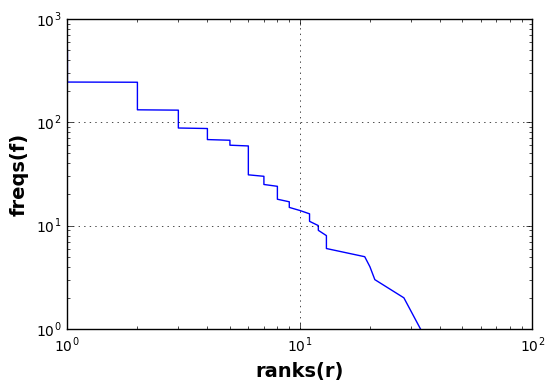

In [17]:
plt.loglog(ranks,freqs)
plt.xlabel('ranks(r)', fontsize=14, fontweight='bold')
plt.ylabel('freqs(f)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()



In [18]:
import csv
import sys

In [19]:
headers=['word','freqs','rank']

In [20]:
with open('Enron.csv','w') as f:
    w = csv.writer(f)
    w.writerow(headers)
   
    w.writerows(sorted_list)